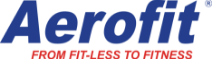

# **Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Product Portfolio:**


1.   The **KP281** is an entry-level treadmill that sells for Dollars 1,500.
2.   The **KP481** is for mid-level runners that sell for Dollars 1,750.
3.   The **KP781** treadmill is having advanced features that sell for 2,500  Dollars.








# **PROBLEM STATEMENT**

1.   To identify the characteristics of the target audience for each type of treadmill offered by the company.
2.   To provide a better recommendation of the treadmills to the new customers.



**GOALS :**

1.   Create a customer profile for each of the products
2.   Compute conditional and marginal probabilities
3.   Share insights and recommendations





# **IMPORTING DATASET AND LIBRARIES**

In [ ]:
# IMPORTING LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# A GLIMPSE OF THE NETFLIX DATASET

df=pd.read_csv("/content/Aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


# **GENERAL OBSERVATIONS**

Shape, Description, Attributes and Datatypes.

In [ ]:
# SHAPE OF THE DATASET
df.shape

(180, 9)

**ANALYSIS:--**
The Aerofit dataset has 180 rows and 9 columns. The Columns represent different features or factors associated with a specific product type which is represented by rows.

In [ ]:
# NAME OF COLUMNS AND THEIR DATATYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**DESCRIPTION:--**
The df.info() command gives insights about the datatype of the columns and the presence of any Null values ,if any.

In [ ]:
# COLUMN NAMES

df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**ANALYSIS:--** The column names depict all the factors and features which may have inter-dependency on the sales of different product types.

# **HANDLING NULL VALUES**

In [ ]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**ANALYSIS:--** The isnull() command gives the number of Null Values in all columns respectively.
This shows that the Dataset is very authentic and data-sufficient to analyse.

# **ANALYSIS OF COLUMNS (FEATURES / FACTORS)**

**COLUMN: PRODUCT**

In [ ]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


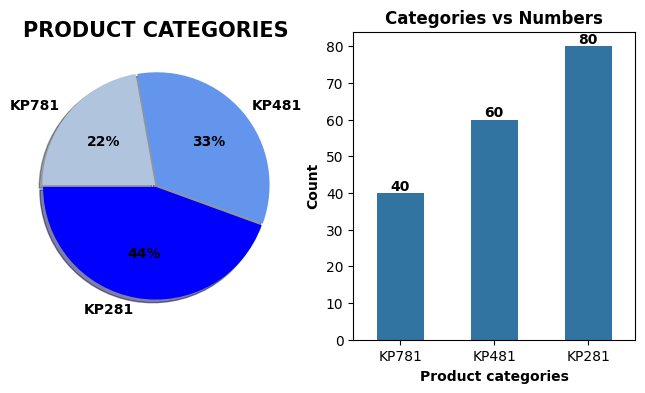

In [ ]:
a=df.groupby("Product")["Product"].count()
b=pd.DataFrame(a)
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(a,labels=["KP281","KP481","KP781"],autopct='%.f%%',colors=["blue","cornflowerblue","lightsteelblue"],explode=[0.01,0.01,0.01],radius=1,startangle = 180,shadow =True,textprops = {"fontsize":10,"color":"black","weight":"bold"})
plt.title("PRODUCT CATEGORIES",{"fontsize":15,"color":"black","weight":"bold"})

plt.subplot(1,2,2)
ax=sns.barplot(x='Product',y='Product', data=b,width=0.5,color='tab:blue')
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Product categories",weight="bold")
plt.ylabel("Count",weight="bold")
ax.set_xticklabels(["KP781","KP481","KP281"])
plt.title('Categories vs Numbers',weight="bold")

plt.show()

**ANALYSIS:--** The data shows a pre-dominance in sales of **KP281** variant of treadmill, which is the basic model, followed by the medium variant **KP481** followed by the top most variant **KP781**.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**************************************************************************


**COLUMN: AGE**

In [ ]:
df.Age.value_counts().head(5)

,count
Age,
25,25
23,18
24,12
26,12
28,9


**ANALYSIS:--** The preliminary Analysis of age column shows that the customers who are 25 years old, dominate the segment followed by customers with 24 years age.

In [ ]:
df.Age.nunique()

32

**ANALYSIS:--** The nunique() command shows that there are 32 unique age datapoints. The analysis of Age can be optimised by converting it into Bins and taking the count.

In [ ]:
# Categorizing age into Bins to get a better analysis as AGE GROUP.

df["Age_group"]=pd.cut(df["Age"],bins=[15,20,25,30,35,40,45,50])
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]"


In [ ]:
df.Age_group.value_counts()

,count
Age_group,
"(20, 25]",69
"(25, 30]",41
"(30, 35]",32
"(35, 40]",16
"(15, 20]",10
"(40, 45]",6
"(45, 50]",6


**ANALYSIS:--** The age_group categorization shows a clear picture that the segment is led by customers with age 20-25 years followed by 25-30 year category depicting the rise of fitness awareness among majorly office-goers.

In [ ]:
df.Age.describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


**ANALYSIS:--** the descibe() function gives a clear picture of the different parameters present in the column -
1. Mean Age- 28.8 years
2. Minimum and Maximum Age - 18 years and 50 years respectively.
3. Modal age- 25 years.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**COLOUMN: GENDER**

In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,104
Female,76


Text(0.5, 1.0, 'GENDER')

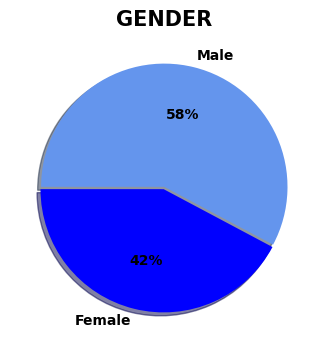

In [ ]:
a=df.groupby("Gender")["Gender"].count()
b=pd.DataFrame(a)

fig = plt.figure(figsize=(8,4))


plt.pie(a,labels=["Female","Male"],autopct='%.f%%',colors=["blue","cornflowerblue"],explode=[0.01,0.01],radius=1,startangle = 180,shadow =True,textprops = {"fontsize":10,"color":"black","weight":"bold"})
plt.title("GENDER",{"fontsize":15,"color":"black","weight":"bold"})

**ANALYSIS:--** The pie chart depicts the uneven spread of fitness enthusiam among Males and Females, with males leading the race.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________


**COLUMN: EDUCATION**

In [ ]:
df.Education.value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


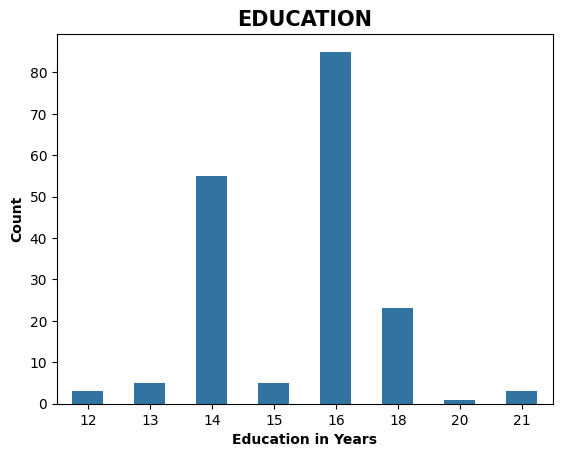

In [ ]:
sns.countplot(x="Education",data=df,width=0.5)
plt.title("EDUCATION",{"fontsize":15,"color":"black","weight":"bold"})
plt.xlabel("Education in Years",weight="bold")
plt.ylabel("Count",weight="bold")
plt.show()

**ANALYSIS:--** The analysis of education column shows that Customers with 16years of education have more leaning towards remaining fit, which is generally the number of years of education required for completing +2 or Diploma in College.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


**COLUMN: MARITAL STATUS**

In [ ]:
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


Text(0.5, 1.0, 'Marital Status')

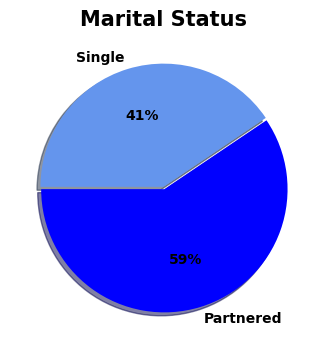

In [ ]:
a=df.groupby("MaritalStatus")["MaritalStatus"].count()
b=pd.DataFrame(a)

fig = plt.figure(figsize=(8,4))


plt.pie(a,labels=["Partnered","Single"],autopct='%.f%%',colors=["blue","cornflowerblue"],explode=[0.01,0.01],radius=1,startangle = 180,shadow =True,textprops = {"fontsize":10,"color":"black","weight":"bold"})
plt.title("Marital Status",{"fontsize":15,"color":"black","weight":"bold"})

**ANALYSIS:--** The analysis of marital status throws a clear picture about the Fitness level among Married couples leading by a good margin than the single customers.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**COLUMN: USAGE**

In [ ]:
df.Usage.value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


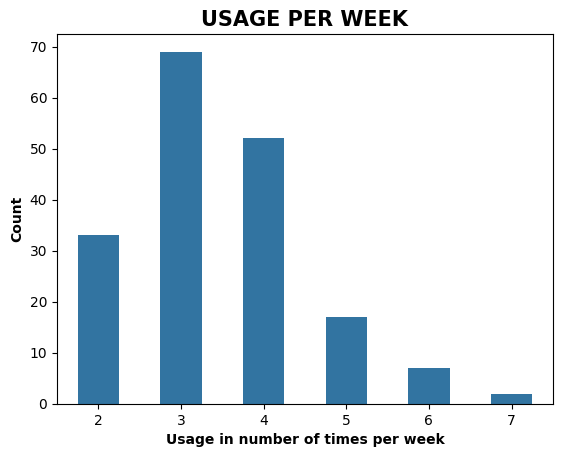

In [ ]:
sns.countplot(x="Usage",data=df,width=0.5)
plt.title("USAGE PER WEEK",{"fontsize":15,"color":"black","weight":"bold"})
plt.xlabel("Usage in number of times per week",weight="bold")
plt.ylabel("Count",weight="bold")
plt.show()

**ANALYSIS:--** The analysis shows that maximum customers use the traedmill for 3 times a week and only 2 customers use it everyday which shows the lack of interest and dedication in maintaining the streak.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**COLUMN: FITNESS**

In [ ]:
df.Fitness.value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


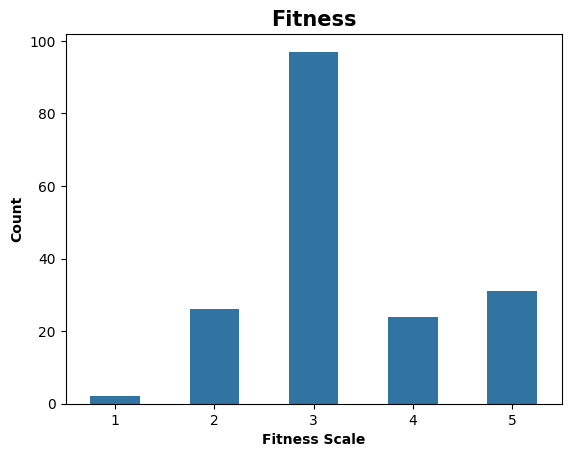

In [ ]:
sns.countplot(x="Fitness",data=df,width=0.5)
plt.title("Fitness",{"fontsize":15,"color":"black","weight":"bold"})
plt.xlabel("Fitness Scale",weight="bold")
plt.ylabel("Count",weight="bold")
plt.show()

**ANALYSIS:--** The fitness analysis clearly shows a balanced self-rating among majority of the customers with "rating - 3" having 97 customers, leading the race and a quite impressive 31 Customers - with "rating of 5"

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**COLUMN: INCOME**

In [ ]:
df.Income.nunique()

62

In [ ]:
df.Income.describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


**ANALYSIS:--** The mean calculated annual income turns out to be $53720, whereas the minimum and maximum annual income are found as 29562 and 104581
dollars respectively showing a huge varriance in the income range.

The standard deviation is also calculated to be 16500 dollars, which is a huge deviation from mean.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**COLUMN: MILES**

In [ ]:
df.Miles.nunique()

37

In [ ]:
df.Miles.describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


**ANALYSIS:--** the analysis for miles column shows that on an average a customer runs/walks 103 miles per week with Minimum and maximum values as 21 and 360 miles with a standard deviation of 52 miles.

This shows the huge variability in the miles data of cutsomers depending upon the level of fitness.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **RELATIONSHIPS**

**AGE vs PRODUCT**

In [ ]:
pd.crosstab(index=df["Age_group"],columns=df["Product"],margins=True)

Product,KP281,KP481,KP781,All
Age_group,,,,
"(15, 20]",6,4,0,10
"(20, 25]",28,24,17,69
"(25, 30]",21,7,13,41
"(30, 35]",11,17,4,32
"(35, 40]",8,6,2,16
"(40, 45]",3,1,2,6
"(45, 50]",3,1,2,6
All,80,60,40,180


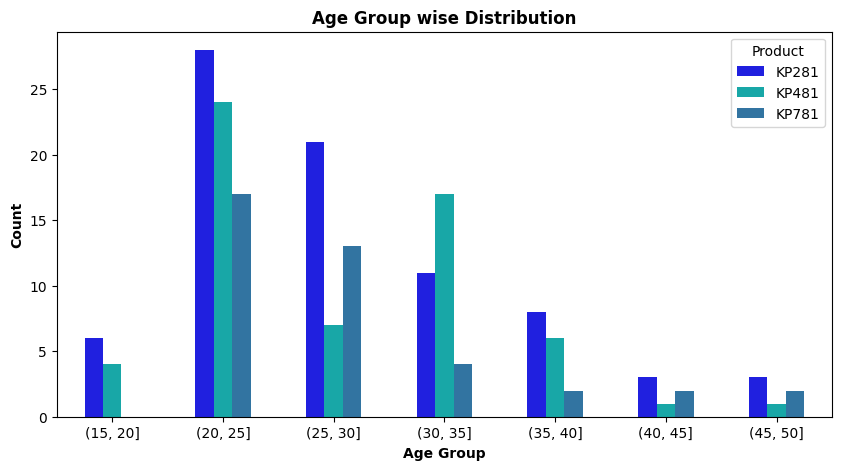

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Age_group",hue="Product",palette=["blue","c","tab:blue"],data=df,width=0.5)
plt.xlabel("Age Group",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title('Age Group wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** The graph shows the customers basically young office-goers with agegroup - 20-25 years as the highest users of all the 3 variants, while KP281 the basic model taking the lead.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**GENDER vs PRODUCT**

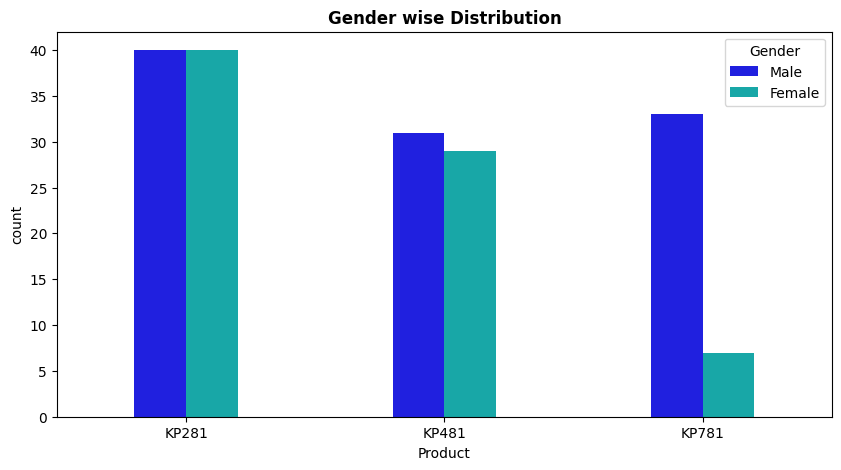

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Product",hue="Gender",palette=["blue","c"],data=df,width=0.4)
plt.title('Gender wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** A general analysis shows that Males lead the race in Fitness Enthsuiasm and awareness.
Though the share of males and females is same for the basic variant i.e. KP281
males lead in the other 2 variants.

________________________________________________________________________________________________________________________________________________________________________________________________________________

**EDUCATION vs PRODUCT**

In [ ]:
pd.crosstab(index=df["Product"],columns=df["Education"],margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


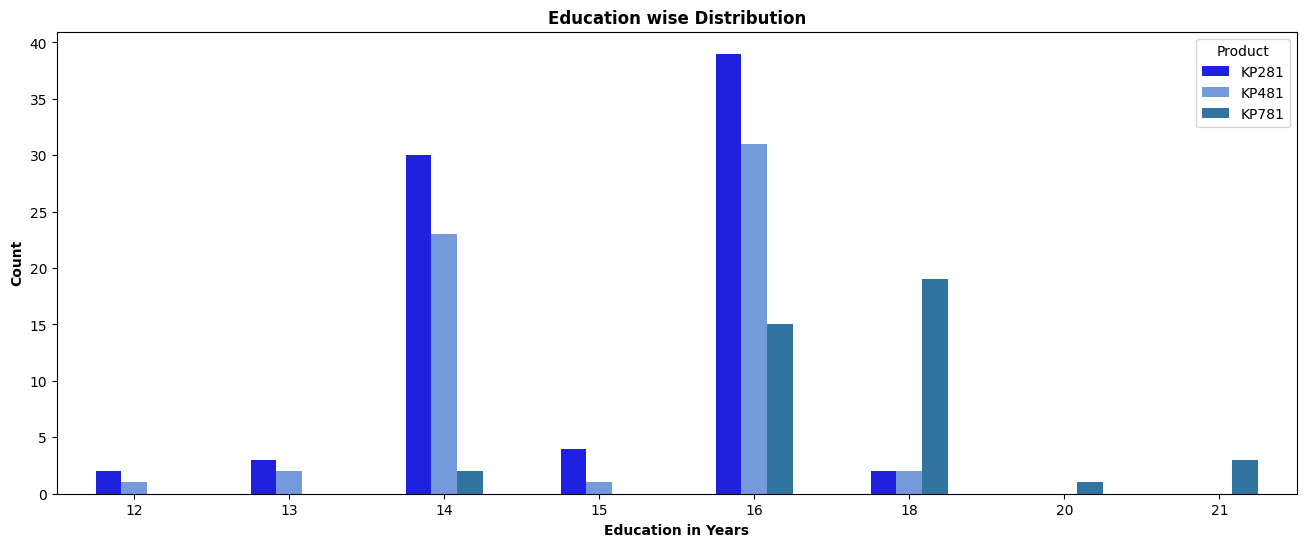

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Education",hue="Product",data=df,width=0.5,palette=["blue","cornflowerblue","tab:blue"])
plt.xlabel("Education in Years",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title('Education wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** the graphs shows that customers with average of 16years of education i.e. customers who are fresh graduates or new-office-goers lead the race with KP281 and KP481 variants whereas, customers with 18years of education lead the race in KP781 category.

It can also be seen that, people with 20 and 21years of education i.e customers with highest degrees of education, prefer the topmost variant of treadmill.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**MARITAL STATUS vs PRODUCT**

In [ ]:
pd.crosstab(index=df["MaritalStatus"],columns=df["Product"],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


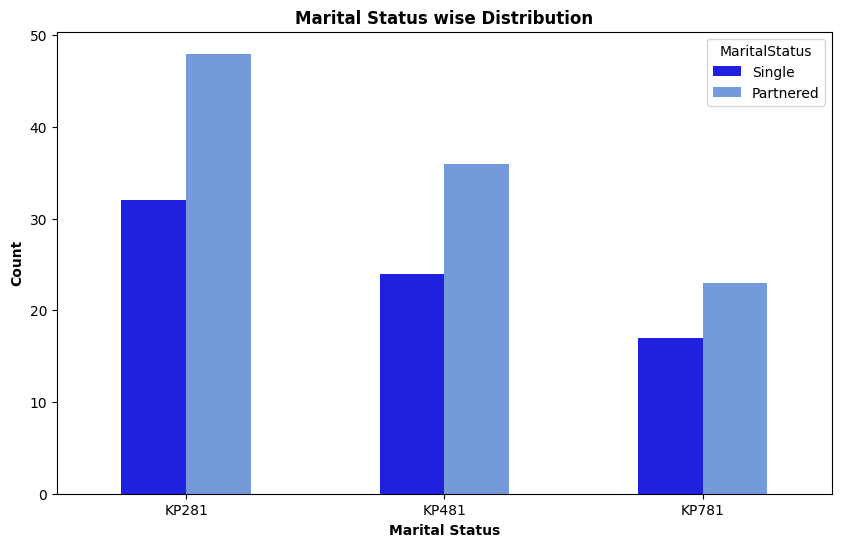

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product",hue="MaritalStatus",palette=["blue","cornflowerblue","tab:blue"],data=df,width=0.5)
plt.xlabel("Marital Status",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title('Marital Status wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** Analysis shows the dominance of Married Partners among the fitness leaderboard for all the 3 variants of the treadmill.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**USAGE vs PRODUCT**




In [ ]:
pd.crosstab(index=df["Product"],columns=df["Usage"],margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


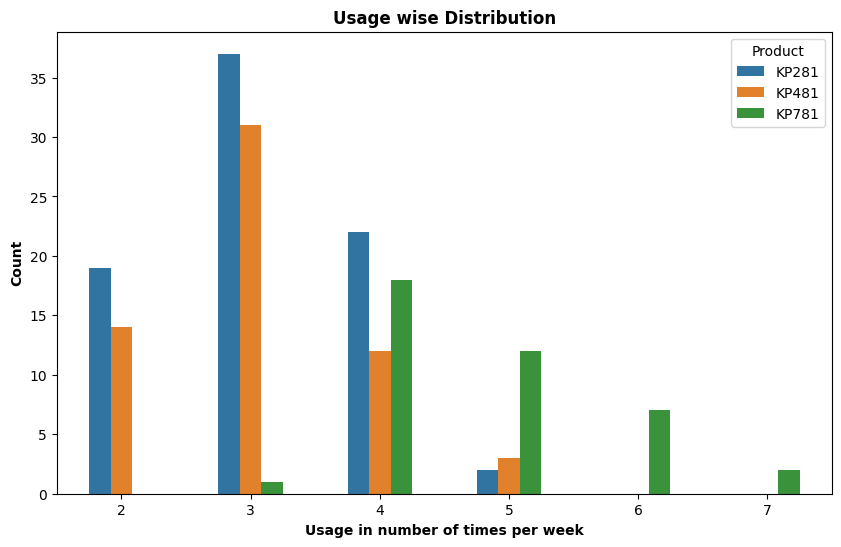

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Usage",hue="Product",data=df,width=0.5)
plt.xlabel("Usage in number of times per week",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title('Usage wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** the graph shows that KP281 and KP481 models are used for 3 times a week on average, whereas the top most model - KP781 is used for more times per week.

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**FITNESS vs PRODUCT**

In [ ]:

pd.crosstab(index=df["Product"],columns=df["Fitness"],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


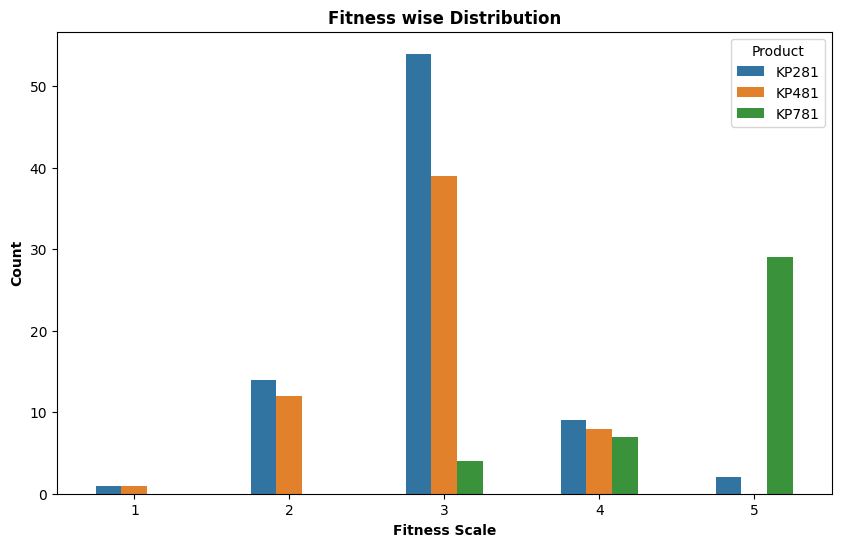

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Fitness",hue="Product",data=df,width=0.5)
plt.xlabel("Fitness Scale",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title('Fitness wise Distribution',weight="bold")
plt.show()

**ANALYSIS:--** On an average , customers using KP281 and KP481 treadmills have rated themselves 3 on average whereas, customers with KP781,the top variant have rated 5 on average.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**INCOME vs PRODUCT**

In [ ]:
pd.crosstab(index=df["Product"],columns=df["Income"],margins=True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,88396,89641,90886,92131,95508,95866,99601,103336,104581,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,1,1,3,2,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,80
KP481,0,0,1,2,3,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,60
KP781,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,1,1,1,1,2,40
All,1,1,2,5,5,5,4,2,5,2,...,2,2,3,3,1,1,1,1,2,180


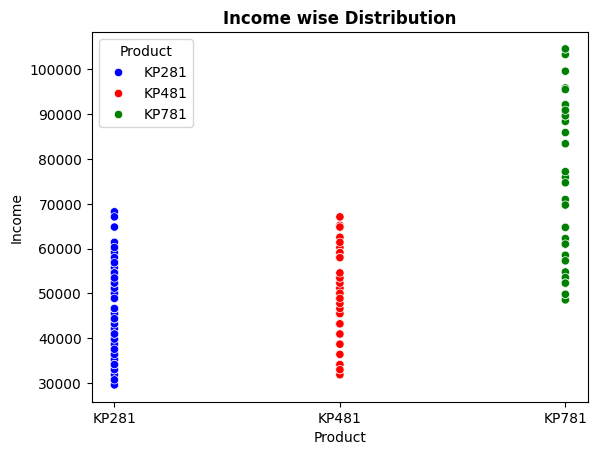

In [ ]:
sns.scatterplot(data=df, x="Product", y="Income",hue="Product",palette=["blue","red","green"])
plt.title('Income wise Distribution',weight="bold")
plt.show()


**ANALYSIS:--** The scatterplot clearly shows the income of customers to be on the higher end who use the top end variant, i.e. KP781

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**MILES vs PRODUCT**

In [ ]:
pd.crosstab(index=df["Product"],columns=df["Miles"],margins=True)

Miles,21,38,42,47,53,56,64,66,74,75,...,180,188,200,212,240,260,280,300,360,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,10,0,10,...,0,1,0,0,0,0,0,0,0,80
KP481,1,0,4,0,7,0,6,0,3,0,...,0,0,0,1,0,0,0,0,0,60
KP781,0,0,0,0,0,0,0,0,0,0,...,6,0,6,0,1,1,1,1,1,40
All,1,3,4,9,7,6,6,10,3,10,...,6,1,6,1,1,1,1,1,1,180


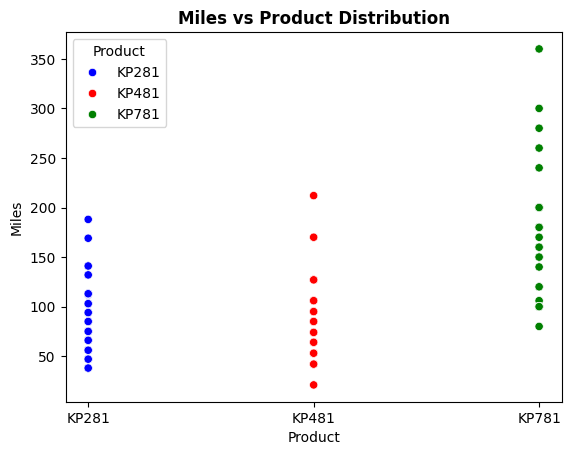

In [ ]:
sns.scatterplot(data=df, x="Product", y="Miles",hue="Product",palette=["blue","red","green"])
plt.title('Miles vs Product Distribution',weight="bold")
plt.show()

**ANALYSIS:--** the graph depicts that the customers with highest end varriant are efficient with their product and the productivity can be seen in the more number of miles run/walked by them.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **DETECTING OUTLIERS**

**AGE OUTLIERS**

In [ ]:
# New df for males and females to calculate age outliers

m_df=df[df["Gender"]=="Male"]
f_df=df[df["Gender"]=="Female"]

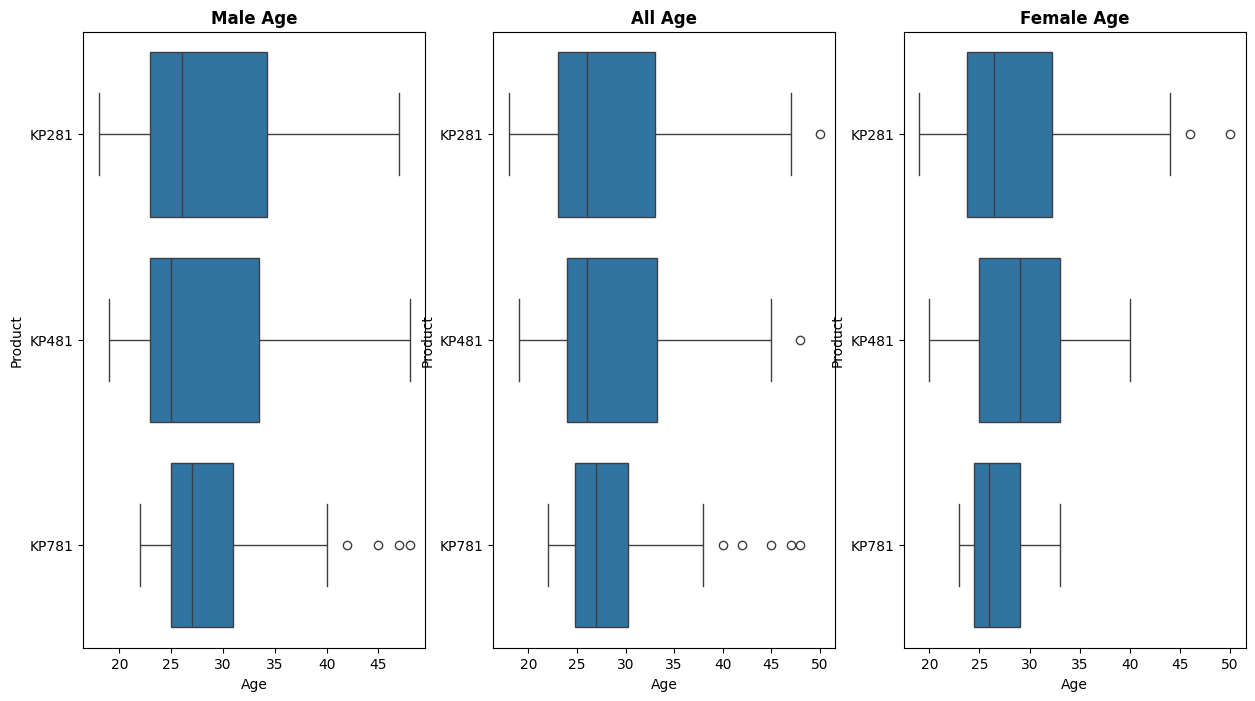

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
sns.boxplot(x="Age",y="Product",data=m_df)
plt.title('Male Age',weight="bold")
plt.subplot(1, 3, 2)
sns.boxplot(x="Age",y="Product",data=df)
plt.title('All Age',weight="bold")
plt.subplot(1, 3, 3)
sns.boxplot(x="Age",y="Product",data=f_df)
plt.title('Female Age',weight="bold")
plt.show()

**ANALYSIS:--** shows the presence of Outliers for men (49) in KP781 category  as they are the ones with highest education level, income and age.

Whereas a female aged 50years in KP281 category is an outlier

# **CUSTOMER PROFILING**

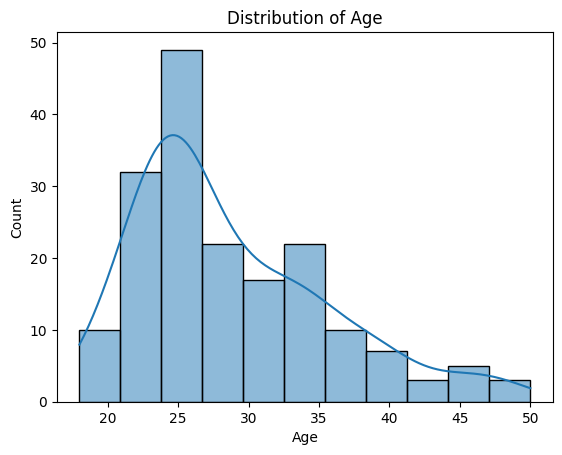

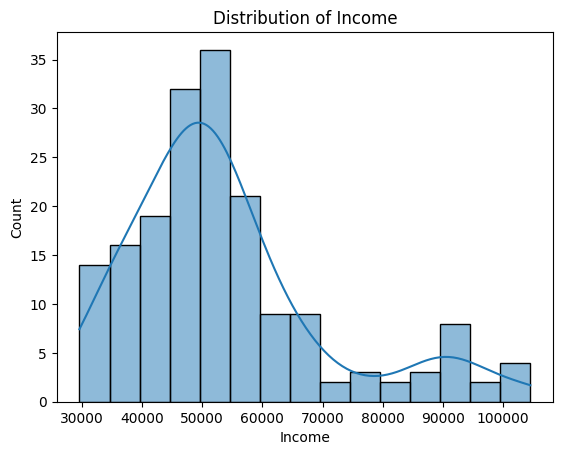

In [ ]:
for col in ['Age', 'Income']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

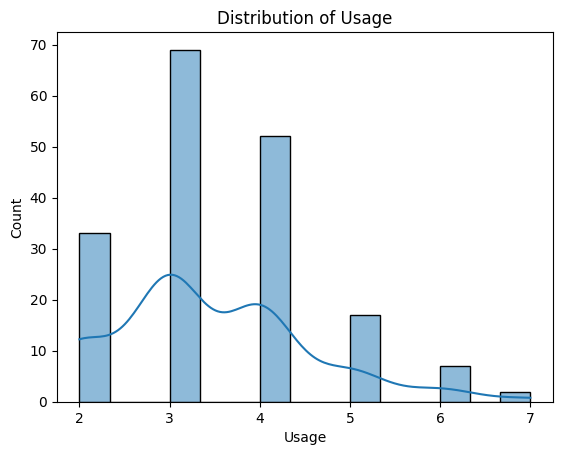

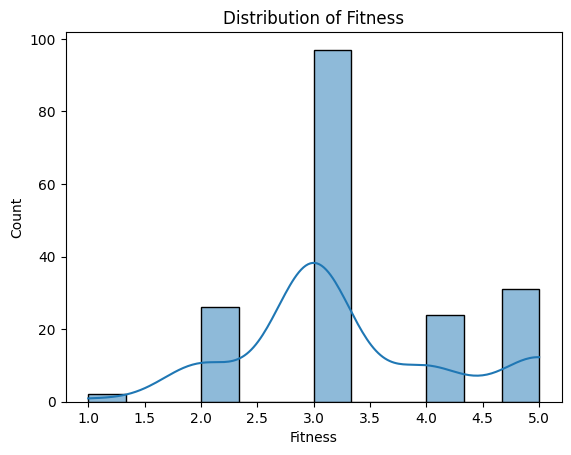

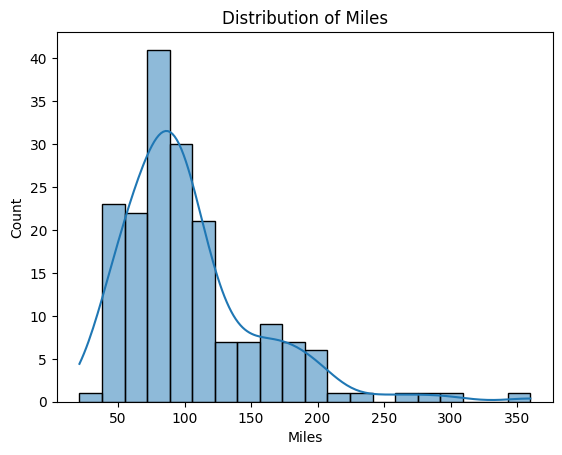

In [ ]:
for col in ['Usage', 'Fitness', 'Miles']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# **Correlation among different factors**

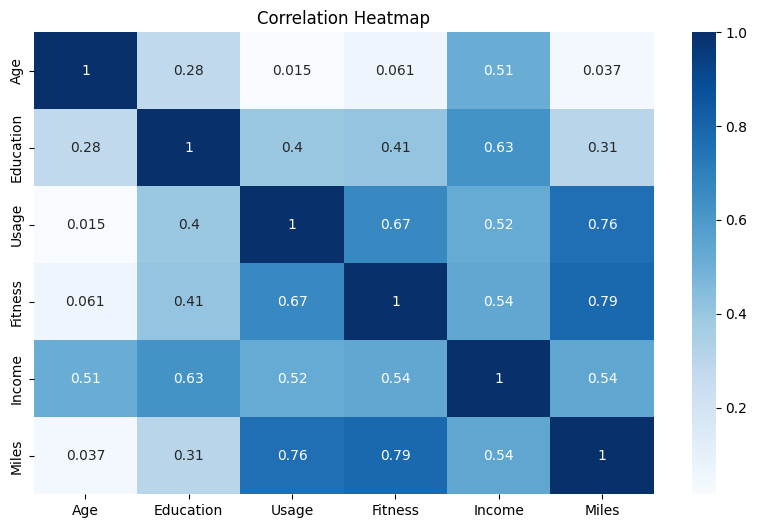

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataframe has only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Now compute the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

plt.show()

______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **MARGINAL and CONDITIONAL PROBABILITY**

**What is the probability of a male customer buying a KP781 treadmill:**


P(customer is a male) = 0.58
[From the pie chart of Gender Based Analysis]

P(male customer buying KP781) =P(customer is a male) ∩ (customer buying KP781) = 0.18
[From the crosstab of Gender Based Analysis]

P(customer will buy KP781|customer is a male)=
P(customer is a male) ∩ (customer buying KP781)/ P(customer is a male)

[By applying conditional probability] =0.18/0.58 = 0.31

**Probability of a male customer buying a KP781 treadmill is 31%.**

**Marginal Probability of customer buying any treadmill**

In [ ]:
mp_df=pd.crosstab(df['Product'], columns='count', normalize=True).reset_index()
mp_df.columns = ['Product', 'Marginal_Probability']
mp_df

,Product,Marginal_Probability
0,KP281,0.444444
1,KP481,0.333333
2,KP781,0.222222


**Marginal Probability of Customer being married or not**

In [ ]:
married_df=pd.crosstab(df['MaritalStatus'], columns='count', normalize=True).reset_index()
married_df.columns = ['MaritalStatus', 'Marginal_Probability']
married_df

,MaritalStatus,Marginal_Probability
0,Partnered,0.594444
1,Single,0.405556


**Marginal probability of customer's gender**

In [ ]:
gender_df=pd.crosstab(df['Gender'], columns='count', normalize=True).reset_index()
gender_df.columns = ['Gender', 'Marginal_Probability']
gender_df

,Gender,Marginal_Probability
0,Female,0.422222
1,Male,0.577778


**CONDITIONAL PROBABILITY**

**Conditional Probability of Product Purchase Based on Age_Group**

In [ ]:
pd.crosstab(df['Age_group'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Age_group,,,
"(15, 20]",0.600000,0.400000,0.000000
"(20, 25]",0.405797,0.347826,0.246377
"(25, 30]",0.512195,0.170732,0.317073
"(30, 35]",0.343750,0.531250,0.125000
"(35, 40]",0.500000,0.375000,0.125000
"(40, 45]",0.500000,0.166667,0.333333
"(45, 50]",0.500000,0.166667,0.333333


**Conditional Probability of Product Purchase Based on Fitness Level**

In [ ]:
pd.crosstab(df['Fitness'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484


**Conditional Probability of Product Purchase Based on Education**

In [ ]:
pd.crosstab(df['Education'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000


# **SUMMARY**

**Product Insights**

1. KP281:
    1. Entry-level treadmill priced at 1,500 USD.
    2. Largest market share: 44%.
    3. Equal ownership among genders.
2. KP481:
    1. Mid-level treadmill priced at 1,750 USD.
    2. Market share: 33%.
    3. Slight male ownership bias.
3. KP781:
    1. Advanced treadmill priced at 2,500 USD.
    2. Market share: 22%.
    3. Predominantly male ownership.

**Customer Demographics**
1. Age:
    1. 60% of customers are aged 20–29.
    2. Mean age: 28 years.
    3. Outlier: A 50-year-old female customer.
2. Gender:
    1. Customer split: 58% male, 42% female.
3. Education:
    1. Most common education levels: 14 and 16 years.
4. Marital Status:
    1. 60% partnered, 40% single.
    2. Partnered customers dominate usage across all models, particularly in the 20–30 age bracket.

# **Recommendations**

1. **Targeted Marketing:**

    Focus KP781 campaigns on high-income, fitness-conscious men. Promote KP281 and KP481 among younger, partnered demographics.

    Influencer Partnerships and Collaboration with fitness influencers who resonate with younger demographics to promote KP281 and KP481.

2. **Product Specific Customisation:**

    Highlight KP281 as a balanced product for both genders. Position KP481 as average for moderately active users.

    Offer accessories like advanced heart rate monitors or virtual training subscriptions for high-income customers.

    Provide customizable color or design options to attract the younger demographic.

3. **Spreading Awareness through education centred campaigns:**
    
    Leverage education-level data to create tailored marketing strategies for spreading fitness awareness among all the age groups.

    Create blog content or webinars explaining the fitness benefits of treadmills.
    
    Use educational campaigns to highlight the compatibility of KP481 for mid-level fitness enthusiasts.

4. **Optimize after-sales with bundled offers.**

# **CONCLUSION**

The Aerofit analysis reveals critical insights into customer demographics, preferences, and product performance, offering a robust foundation for strategic decision-making. By aligning its marketing and product strategies with customer insights, Aerofit is well-positioned to strengthen its market presence, enhance customer satisfaction, and drive sustained growth in the fitness equipment industry.